### Importación de bibliotecas

In [74]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##Procesamiento del archivo
Regex: Biblioteca para trabajar con expresiones regulares, que permiten buscar y extraer patrones complejos en cadenas de texto (como números en este caso).

```
re.findall(r'[-+]?\d*\.?\d+', line)
```

##**¿Cómo funciona?**

### **1. `[-+]?`**
- **`[-+]`**: Busca un signo negativo (`-`) o positivo (`+`) al inicio del número.
  - Ejemplo: `-3`, `+4`, `5` (aunque el signo es opcional).
- **`?`**: Hace que el signo sea **opcional**.
  - Esto significa que puede haber **cero** o **uno** signos al inicio.
  - Ejemplos válidos: `+3.14`, `-2.71`, `4.0` (sin signo).

---

### **2. `\d*`**
- **`\d`**: Representa un dígito del 0 al 9.
- **`*`**: Significa "cero o más repeticiones" del dígito.
  - Esto permite capturar números como `123`, `0`, o incluso que no haya dígitos antes del punto decimal (por ejemplo, `.5`).

---

### **3. `\.`**
- **`\.`**: Representa un punto decimal **literal**.
  - Nota: El carácter `.` en expresiones regulares normalmente significa "cualquier carácter". Pero al usar la barra invertida (`\.`), indicamos que queremos el **punto literal**.

---

### **4. `\d+`**
- **`\d`**: Representa un dígito del 0 al 9.
- **`+`**: Significa "uno o más repeticiones" del dígito.
  - Esto asegura que siempre haya al menos un dígito después del punto decimal.
  - Ejemplos válidos:
    - `3.14` (porque hay `14` después del punto).
    - `.5` (porque hay `5` después del punto).



### **5. Combinación completa: `[-+]?\d*\.?\d+`**
Combinación de todas las partes:
- **`[-+]?`**: Opcionalmente, puede haber un signo `+` o `-` al inicio.
- **`\d*`**: Puede haber cero o más dígitos antes del punto decimal.
- **`\.?`**: El punto decimal es **opcional**, porque un número puede ser un entero (sin punto).
- **`\d+`**: Debe haber al menos un dígito después del punto si el punto está presente


In [75]:
def procesamiento_archivo_histeresis(nombre_archivo):
    datos_corregidos = []
    with open(nombre_archivo, 'r') as archivo:
        for linea in archivo:
            coincidencias = re.findall(r'[-+]?\d*\.?\d+', linea)
            if len(coincidencias) == 3:  #(t,B,H)
                datos_corregidos.append([float(valor) for valor in coincidencias])
    return pd.DataFrame(datos_corregidos, columns=["Tiempo (ms)", "Campo externo (B) (mT)", "Densidad campo interno (H) (A/m)"])

In [76]:
def calculo_area_histeresis(df):
    df["Campo externo (B) (T)"] = df["Campo externo (B) (mT)"] * 1e-3 #(T -> mT)
    return abs(np.trapz(df["Densidad campo interno (H) (A/m)"], df["Campo externo (B) (T)"]))

In [77]:
nombre_archivo = 'hysteresis.dat'

df = procesamiento_archivo_histeresis(nombre_archivo)

energy_loss = calculo_area_histeresis(df)

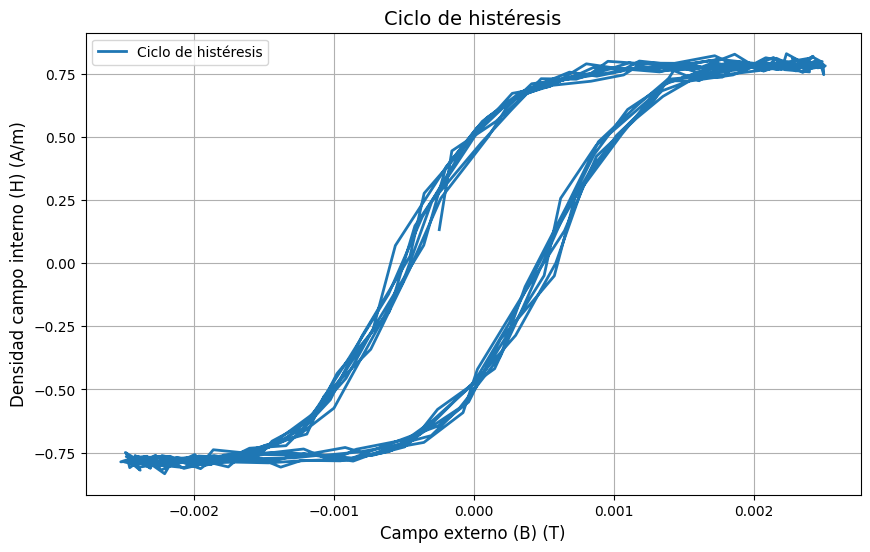

Energía perdida por unidad de volumen: 0.012083 J/m³


In [80]:
# Crear el gráfico de H como función de B
plt.figure(figsize=(10, 6))
plt.plot(df["Campo externo (B) (T)"], df["Densidad campo interno (H) (A/m)"], label="Ciclo de histéresis", linewidth=2)
plt.xlabel("Campo externo (B) (T)", fontsize=12)
plt.ylabel("Densidad campo interno (H) (A/m)", fontsize=12)
plt.title("Ciclo de histéresis", fontsize=14)
plt.grid(True)
plt.legend()


# Guardar el gráfico como PDF en Colab
plt.savefig("/content/energy.pdf")

# Mostrar el gráfico
plt.show()


print(f"Energía perdida por unidad de volumen: {energy_loss:.6f} J/m³")